In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/long/Desktop/Data-Practice


In [2]:
from ga_revenue_predict import Loader
loader = Loader.Loader()
df_train, df_test = loader.run(mode='parsed')

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_train.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
count,903653,903653,903653,903653,903653.000000,9.036530e+05,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,450630.0,903653.000000,703060.0,903553.000000,1.151500e+04,903653.0,10946,21460,21561,21460,21460,21460,903653,274005,400724,903653,330941,903653
unique,8,366,714167,902755,NaN,NaN,54,3,2,20,649,6,222,94,28064,376,23,NaN,NaN,NaN,NaN,NaN,NaN,44,2,17774,1,8,2,10,1,3659,7,1475,380
top,Organic Search,2016-11-28 00:00:00,1957458976293878100,5501176514964856126_1472799309,NaN,NaN,Chrome,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,NaN,NaN,NaN,NaN,NaN,NaN,Google Merchandise Collection,Google Search,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,False,1,Top,(not set),True,(not provided),organic,/,google
freq,381561,4807,278,2,NaN,NaN,620364,664479,664530,350072,508229,450377,364744,508229,244881,508229,390657,NaN,NaN,NaN,NaN,NaN,NaN,5122,21453,70,21460,21362,20956,865347,274005,366363,381561,75523,400788
first,NaN,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.264897,1.485007e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,1.0,3.849764,1.337448e+08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,9.283735,9.022124e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.641437,0.0,7.025274,4.482852e+08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.470035e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.000000,1.000000e+04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.477561e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.000000,2.493000e+07,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 1. Fill NAs
def fill_values(df):
    df = df.fillna({
        'totals.bounces': 0,
        'totals.newVisits': 0,
        'totals.pageviews': df['totals.hits'],
        'trafficSource.adContent': 'na',
        'trafficSource.adwordsClickInfo.adNetworkType': 'na',
        'trafficSource.adwordsClickInfo.gclId': 'na',
        'trafficSource.adwordsClickInfo.isVideoAd': 'na',
        'trafficSource.adwordsClickInfo.page': 'na',
        'trafficSource.adwordsClickInfo.slot': 'na',
        'trafficSource.isTrueDirect': False,
        'trafficSource.keyword': 'na',
        'trafficSource.referralPath': 'na',
        'totals.transactionRevenue': 0.0
    })
    return df

In [5]:
df_train = fill_values(df_train)
df_test = fill_values(df_test)

In [6]:
df_train.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
count,903653,903653,903653,903653,903653.000000,9.036530e+05,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653.000000,903653.000000,903653.000000,903653.000000,9.036530e+05,903653.0,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653
unique,8,366,714167,902755,NaN,NaN,54,3,2,20,649,6,222,94,28064,376,23,NaN,NaN,NaN,NaN,NaN,NaN,45,3,17775,2,9,3,10,2,3660,7,1476,380
top,Organic Search,2016-11-28 00:00:00,1957458976293878100,5501176514964856126_1472799309,NaN,NaN,Chrome,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,NaN,NaN,NaN,NaN,NaN,NaN,na,na,na,na,na,na,(not set),False,na,organic,na,google
freq,381561,4807,278,2,NaN,NaN,620364,664479,664530,350072,508229,450377,364744,508229,244881,508229,390657,NaN,NaN,NaN,NaN,NaN,NaN,892707,882193,882092,882193,882193,882193,865347,629648,502929,381561,572712,400788
first,NaN,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.264897,1.485007e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498676,4.596538,0.778020,3.849519,1.704273e+06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,9.283735,9.022124e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499999,9.641437,0.415578,7.024945,5.277866e+07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.470035e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.477561e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Save both dataframes
df_train.to_csv('../data/train_filled.csv', index=False)
df_test.to_csv('../data/test_filled.csv', index=False)

In [2]:
# EDA
import pandas as pd
df_train = pd.read_csv('../data/train_filled.csv', low_memory=False)
df_test = pd.read_csv('../data/test_filled.csv', low_memory=False)

In [3]:
# 1. Duplicated session ID
def deduplicate_repeated_sessionId(df):
    import numpy as np
    dedup_method = dict()
    for col in df.columns:
        if col in ['totals.bounces']:
            dedup_method.update({col: np.min})
        elif col in ['totals.hits', 'totals.pageviews', 'totals.transactionRevenue']:
            dedup_method.update({col: np.sum})
        elif col in ['totals.newVisits']:
            dedup_method.update({col: np.max})
        else:
            dedup_method.update({col: np.min})
    df_dup_id = df[['sessionId', 'fullVisitorId']].groupby('sessionId').size().reset_index()
    df_dup_id.columns = ['sessionId', 'cnt']
    list_dup_id = df_dup_id[df_dup_id['cnt'] > 1]['sessionId'].tolist()
    
    # Split
    df_dup_sessions = df[df['sessionId'].isin(list_dup_id)]
    df_non_dup_sessions = df[~df['sessionId'].isin(list_dup_id)]
    
    df_deduped = df_dup_sessions.groupby('sessionId').agg(dedup_method).drop('sessionId', axis=1).reset_index()
    return pd.concat([df_non_dup_sessions, df_deduped], sort=False)

In [4]:
print(df_train.shape)
print(df_test.shape)

df_train_dedupped = deduplicate_repeated_sessionId(df_train)
df_test_dedupped = deduplicate_repeated_sessionId(df_test)

print(df_train_dedupped.shape)
print(df_test_dedupped.shape)

(903653, 35)
(804684, 34)
(902755, 35)
(803863, 34)


In [5]:
df_train_dedupped.head()

,channelGrouping,date,fullVisitorId,sessionId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1.0,1.472830e+09,Chrome,desktop,False,Windows,...,na,na,na,na,(not set),False,(not provided),organic,na,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1.0,1.472880e+09,Firefox,desktop,False,Macintosh,...,na,na,na,na,(not set),False,(not provided),organic,na,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1.0,1.472865e+09,Chrome,desktop,False,Windows,...,na,na,na,na,(not set),False,(not provided),organic,na,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1.0,1.472881e+09,UC Browser,desktop,False,Linux,...,na,na,na,na,(not set),False,google + online,organic,na,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,2.0,1.472823e+09,Chrome,mobile,True,Android,...,na,na,na,na,(not set),True,(not provided),organic,na,google


In [6]:
df_train_dedupped.describe()

,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits
count,902755.000000,9.027550e+05,902755.000000,902755.000000,902755.000000,902755.000000,9.027550e+05,902755.0
mean,2.265059,1.485006e+09,0.498753,4.601110,0.778101,3.853348,1.705968e+06,1.0
std,9.287168,9.021360e+06,0.499999,9.660817,0.415523,7.039325,5.280542e+07,0.0
min,1.000000,1.470035e+09,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.0
25%,1.000000,1.477562e+09,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.0
50%,1.000000,1.483945e+09,0.000000,2.000000,1.000000,1.000000,0.000000e+00,1.0
75%,1.000000,1.492755e+09,1.000000,4.000000,1.000000,4.000000,0.000000e+00,1.0
max,395.000000,1.501657e+09,1.000000,500.000000,1.000000,469.000000,2.312950e+10,1.0


In [7]:
# 2. Bounced sessions
import numpy as np
df_train_dedupped[df_train_dedupped['totals.bounces']==1.0].agg({'totals.transactionRevenue': np.sum})
#df_train_dedupped[df_train_dedupped['totals.bounces']!=1.0].agg({'totals.transactionRevenue': np.sum})

totals.transactionRevenue    0.0
dtype: float64

In [8]:
# 0. By common sense, bounced sessions do not have purchase. No need to explicitly predict them.
def drop_bounced_sessions(df):
    return df[df['totals.bounces']==0].copy()

df_train_flt = drop_bounced_sessions(df_train_dedupped)
df_test_flt = drop_bounced_sessions(df_test_dedupped)
print(df_train_flt.shape)
print(df_test_flt.shape)

(452503, 35)
(383282, 34)


In [9]:
df_train_flt.describe()

,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits
count,452503.000000,4.525030e+05,452503.0,452503.000000,452503.000000,452503.000000,4.525030e+05,452503.0
mean,2.485343,1.485008e+09,0.0,8.175347,0.745429,6.692265,3.403450e+06,1.0
std,10.435830,9.011762e+06,0.0,12.671840,0.435620,9.093862,7.454651e+07,0.0
min,1.000000,1.470035e+09,0.0,1.000000,0.000000,1.000000,0.000000e+00,1.0
25%,1.000000,1.477601e+09,0.0,2.000000,0.000000,2.000000,0.000000e+00,1.0
50%,1.000000,1.483842e+09,0.0,4.000000,1.000000,4.000000,0.000000e+00,1.0
75%,2.000000,1.492793e+09,0.0,9.000000,1.000000,7.000000,0.000000e+00,1.0
max,395.000000,1.501657e+09,0.0,500.000000,1.000000,469.000000,2.312950e+10,1.0


In [10]:
print(df_train_dedupped['totals.transactionRevenue'].sum())
print(df_train_flt['totals.transactionRevenue'].sum())

1540071240000.0
1540071240000.0


In [11]:
# Do a easy model first, predict session level purchase
# Cassify purchase or not, so create a new target
df_train_flt['isPurchase'] = df_train_flt['totals.transactionRevenue'] > 0.0
df_train_flt['isPurchase'] = df_train_flt['isPurchase'].map({True: 1, False:0})
df_train_flt.drop('totals.transactionRevenue', axis=1, inplace=True)

TARGET = df_train_flt['isPurchase'].copy()
TRAIN = df_train_flt.drop('isPurchase', axis=1).copy()

# 1. Drop some columns
use_cols = ['channelGrouping', 'visitNumber', 
            'device.deviceCategory', 'device.isMobile',
            'totals.hits', 'totals.newVisits', 'totals.pageviews',
            'trafficSource.isTrueDirect'
           ]
TRAIN = TRAIN[use_cols]
TRAIN.shape

(452503, 8)

In [12]:
TARGET.sum()

11514

In [13]:
TRAIN.describe(include='all')

,channelGrouping,visitNumber,device.deviceCategory,device.isMobile,totals.hits,totals.newVisits,totals.pageviews,trafficSource.isTrueDirect
count,452503,452503.000000,452503,452503,452503.000000,452503.000000,452503.000000,452503
unique,8,NaN,3,2,NaN,NaN,NaN,2
top,Organic Search,NaN,desktop,False,NaN,NaN,NaN,False
freq,196934,NaN,337024,337026,NaN,NaN,NaN,306100
mean,NaN,2.485343,NaN,NaN,8.175347,0.745429,6.692265,NaN
std,NaN,10.435830,NaN,NaN,12.671840,0.435620,9.093862,NaN
min,NaN,1.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,2.000000,0.000000,2.000000,NaN
50%,NaN,1.000000,NaN,NaN,4.000000,1.000000,4.000000,NaN
75%,NaN,2.000000,NaN,NaN,9.000000,1.000000,7.000000,NaN


In [14]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn_pandas import DataFrameMapper, gen_features


class ModifiedLabelEncoder(LabelEncoder):

    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)
    

feature_cat = gen_features(columns=['channelGrouping', 'device.deviceCategory'],
                           classes=[ModifiedLabelEncoder,
                                    OneHotEncoder
                                    ]
                           )
feature_num = gen_features(columns=[['visitNumber'],
                                    ['device.isMobile'],
                                    ['totals.hits'], ['totals.newVisits'], ['totals.pageviews'], 
                                    ['trafficSource.isTrueDirect']],
                           classes=[StandardScaler])
mapper = DataFrameMapper(
    feature_cat + feature_num,
    input_df=True, df_out=True)

In [15]:
TRAIN_preprocessed = mapper.fit_transform(TRAIN.copy())

In [16]:
TRAIN_preprocessed.head()

,channelGrouping_(Other),channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet,visitNumber,device.isMobile,totals.hits,totals.newVisits,totals.pageviews,trafficSource.isTrueDirect
265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.142331,-0.585351,-0.487329,0.584388,-0.515982,-0.691581
266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.046507,1.708378,-0.487329,-1.711193,-0.515982,1.445961
267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.142331,-0.585351,-0.487329,0.584388,-0.515982,-0.691581
268,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.142331,1.708378,-0.487329,0.584388,-0.515982,-0.691581
269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.142331,-0.585351,-0.487329,0.584388,-0.515982,-0.691581


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TRAIN_preprocessed, TARGET, random_state=26)

In [18]:
y_train.unique()

array([0, 1])

In [19]:
X_train.describe()

,channelGrouping_(Other),channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet,visitNumber,device.isMobile,totals.hits,totals.newVisits,totals.pageviews,trafficSource.isTrueDirect
count,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000,339377.000000
mean,0.000150,0.016937,0.158817,0.008707,0.435365,0.034622,0.171270,0.174131,0.744326,0.221468,0.034207,-0.001198,0.001070,0.000401,0.000531,0.000390,-0.001582
std,0.012258,0.129035,0.365506,0.092905,0.495805,0.182821,0.376745,0.379223,0.436240,0.415235,0.181760,0.987238,1.000602,1.003429,0.999702,1.005515,0.999403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.142331,-0.585351,-0.566244,-1.711193,-0.625947,-0.691581
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.142331,-0.585351,-0.487329,-1.711193,-0.515982,-0.691581
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.142331,-0.585351,-0.329498,0.584388,-0.296053,-0.691581
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.046507,1.708378,0.065078,0.584388,0.033840,1.445961
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.612256,1.708378,38.812453,0.584388,50.837392,1.445961


In [20]:
y_train.describe()

count    339377.000000
mean          0.025417
std           0.157389
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isPurchase, dtype: float64

In [21]:
# Auto-sklearn
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=5*60,
        per_run_time_limit=45,
        #tmp_folder=os.path.join('tmp', 'autosklearn_cv_example_tmp'),
        #output_folder=os.path.join('tmp', 'autosklearn_cv_example_out'),
        #delete_tmp_folder_after_terminate=True,
        #resampling_strategy='holdout',
        resampling_strategy_arguments={'folds': 3},
        ml_memory_limit=2048 * 10
    )
# Train to find best parameters
automl.fit(X_train, y_train, dataset_name='garp', metric=autosklearn.metrics.roc_auc)
automl.refit(X_train.copy(), y_train.copy())

/home/long/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-09-24 11:49:44,835:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:44,883:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:46,888:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:48,896:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:50,901:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:52,907:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:54,916:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:56,920:EnsembleBuilder(1):garp] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-24 11:49:58,925:EnsembleBuilder(1):garp] No models better tha

/home/long/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/long/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-09-24 11:50:56,080:EnsembleBuilder(1):garp] Memory Exception -- restart with less ensemle_nbest: 25
[WARNING] [2018-09-24 11:51:00,114:EnsembleBuilder(1):garp] Memory Exception -- restart with less ensemle_nbest: 12
[WARNING] [2018-09-24 11:51:03,060:EnsembleBuilder(1):garp] Memory Exception -- restart with less ensemle_nbest: 6
[WARNING] [2018-09-24 11:51:08,791:EnsembleBuilder(1):garp] Memory Exception -- restart with less ensemle_nbest: 3
[WARNING] [2018-09-24 11:51:14,962:EnsembleBuilder(1):garp] Memory Exception -- restart with less ensemle_nbest: 1


/home/long/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/long/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_nbest=50,
           ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25,
           ml_memory_limit=20480, output_folder=None,
           per_run_time_limit=45, resampling_strategy='holdout',
           resampling_strategy_arguments={'folds': 3}, seed=1,
           shared_mode=False, smac_scenario_args=None,
           time_left_for_this_task=300, tmp_folder=None)

In [22]:
print(automl.show_models())

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'gradient_boosting', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:gradient_boosting:criterion': 'mse', 'classifier:gradient_boosting:learning_rate': 0.12713527337147906, 'classifier:gradient_boosting:loss': 'deviance', 'classifier:gradient_boosting:max_depth': 4, 'classifier:gradient_boosting:max_features': 0.6041596127474019, 'classifier:gradient_boosting:max_leaf_nodes': 'None', 'classifier:gradient_boosting:min_impurity_decrease': 0.0, 'classifier:gradient_boosting:min_samples_leaf': 14, 'classifier:gradient_boosting:min_samples_split': 17, 'classifier:gradient_boosting:min_weight_fraction_leaf': 0.0, 'classifier:gradient_boosting:n_estimators': 83, 'classifier:gradient_boosting:subsample': 0.8426859880999615},
dataset_properties={
  'task': 1,
  'sparse':

In [23]:
print(automl.cv_results_)

{'mean_test_score': array([0.92488563, 0.96444229, 0.90412808, 0.9696075 , 0.        ,
       0.        , 0.        , 0.        ]), 'mean_fit_time': array([23.12427425, 35.95473146, 39.99459958, 28.0456996 , 45.05983949,
       45.12447858, 45.06345797, 18.03552341]), 'params': [{'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random

In [24]:
import sklearn
predictions = automl.predict(X_test)
print("accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))
print("F1 score", sklearn.metrics.f1_score(y_test, predictions))
print("precision score", sklearn.metrics.precision_score(y_test, predictions))
print("recall score", sklearn.metrics.recall_score(y_test, predictions))

accuracy score 0.8885136926966392
F1 score 0.3058888277380297
precision score 0.1818479256641801
recall score 0.9622576177285319


In [26]:
print(sum(predictions))
print(sum(y_test))

15282
2888


Confusion matrix, without normalization
[[97735 12503]
 [  109  2779]]
Normalized confusion matrix
[[0.89 0.11]
 [0.04 0.96]]


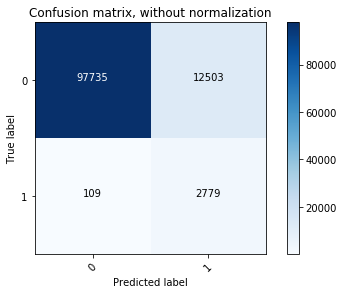

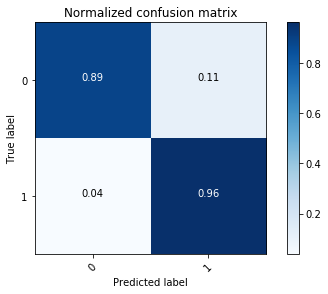

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import svm, datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

class_names = y_test.unique()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)